## ☎️ Projeto Aprendizagem de Máquina - Análises para o relatório 2 (Data Understanding)

### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 📚 Importando as bibliotecas necessárias

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


In [ ]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=1121d28f00a3f1fd8600dd326fcd2bae7fae71524ba5d969e515f1184c8c7536
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn import preprocessing
import optuna
import warnings
import arff

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 15, 10

warnings.filterwarnings('ignore')

sns.set(style="whitegrid")
colors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9e52f", "#d0ee11", "#d0f400"]
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

In [ ]:
with open('/content/drive/MyDrive/Projetos Aprendizagem de Máquina/Terceiro Projeto/1. Dados/pol.arff', 'r') as file:
    data = arff.load(file)

df = pd.DataFrame(data['data'])

df.columns = [attr[0] for attr in data['attributes']]

In [ ]:
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f40,f41,f42,f43,f44,f45,f46,f47,f48,binaryClass
0,110.0,100.0,100.0,100.0,60.0,108.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
1,110.0,100.0,100.0,100.0,130.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
2,110.0,100.0,100.0,100.0,110.0,89.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
3,110.0,100.0,100.0,100.0,13.0,126.0,89.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
4,110.0,100.0,100.0,100.0,15.0,119.0,78.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
5,110.0,100.0,100.0,100.0,50.0,113.0,100.0,143.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
6,110.0,100.0,100.0,100.0,117.0,77.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
7,110.0,100.0,100.0,100.0,81.0,110.0,77.0,72.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P
8,110.0,100.0,100.0,100.0,44.0,96.0,76.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
9,110.0,100.0,100.0,100.0,66.0,80.0,95.0,71.0,94.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


### 📊 Entendimento e exploração dos dados

#### Estatísticas descritivas (média, mediana, desvio padrão, etc.).

In [ ]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48
count,15000.0,15000.0,15000.0,15000.0,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.0,...,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0,15000.0
mean,110.0,100.0,100.0,100.0,76.879200,94.516600,83.76760,75.400400,95.909733,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,35.252824,20.868783,16.33012,13.371766,8.553233,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,110.0,100.0,100.0,100.0,13.000000,77.000000,76.00000,71.000000,94.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,110.0,100.0,100.0,100.0,56.000000,77.000000,76.00000,71.000000,94.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,110.0,100.0,100.0,100.0,74.000000,86.000000,76.00000,71.000000,94.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,110.0,100.0,100.0,100.0,100.000000,106.000000,81.00000,72.000000,94.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,110.0,100.0,100.0,100.0,200.000000,200.000000,200.00000,200.000000,200.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Suspeita inicial a partir do cálculo das estatísticas descritivas: existem colunas cuja variabilidade de valores é 0. Isso não ajuda o modelo a fazer discriminações e pode acrescentar ruído na hora do treinamento, vamos verificar:

In [ ]:
colunas_sem_variabilidade = [col for col in df.columns if df[col].nunique() == 1]

print("Colunas sem variabilidade (todos os valores são iguais):")
for col in colunas_sem_variabilidade:
    print(f"{col}: {df[col].unique()[0]}")

Colunas sem variabilidade (todos os valores são iguais):
f1: 110.0
f2: 100.0
f3: 100.0
f4: 100.0
f10: 0.0
f11: 0.0
f12: 0.0
f34: 0.0
f35: 0.0
f36: 0.0
f37: 0.0
f38: 0.0
f39: 0.0
f40: 0.0
f41: 0.0
f42: 0.0
f43: 0.0
f44: 0.0
f45: 0.0
f46: 0.0
f47: 0.0
f48: 0.0


Proposta para etapa de pré-processamento: retirar as colunas listadas anteriormente.

#### Distribuição dos dados (histogramas, boxplots, etc.).

Antes de plotar os graficos de distribuição, vamos retirar as colunas sem variabilidade, pois a distribuição delas será um valor constante.

In [ ]:
df_reduzido = df.drop(columns=colunas_sem_variabilidade)

##### Histogramas

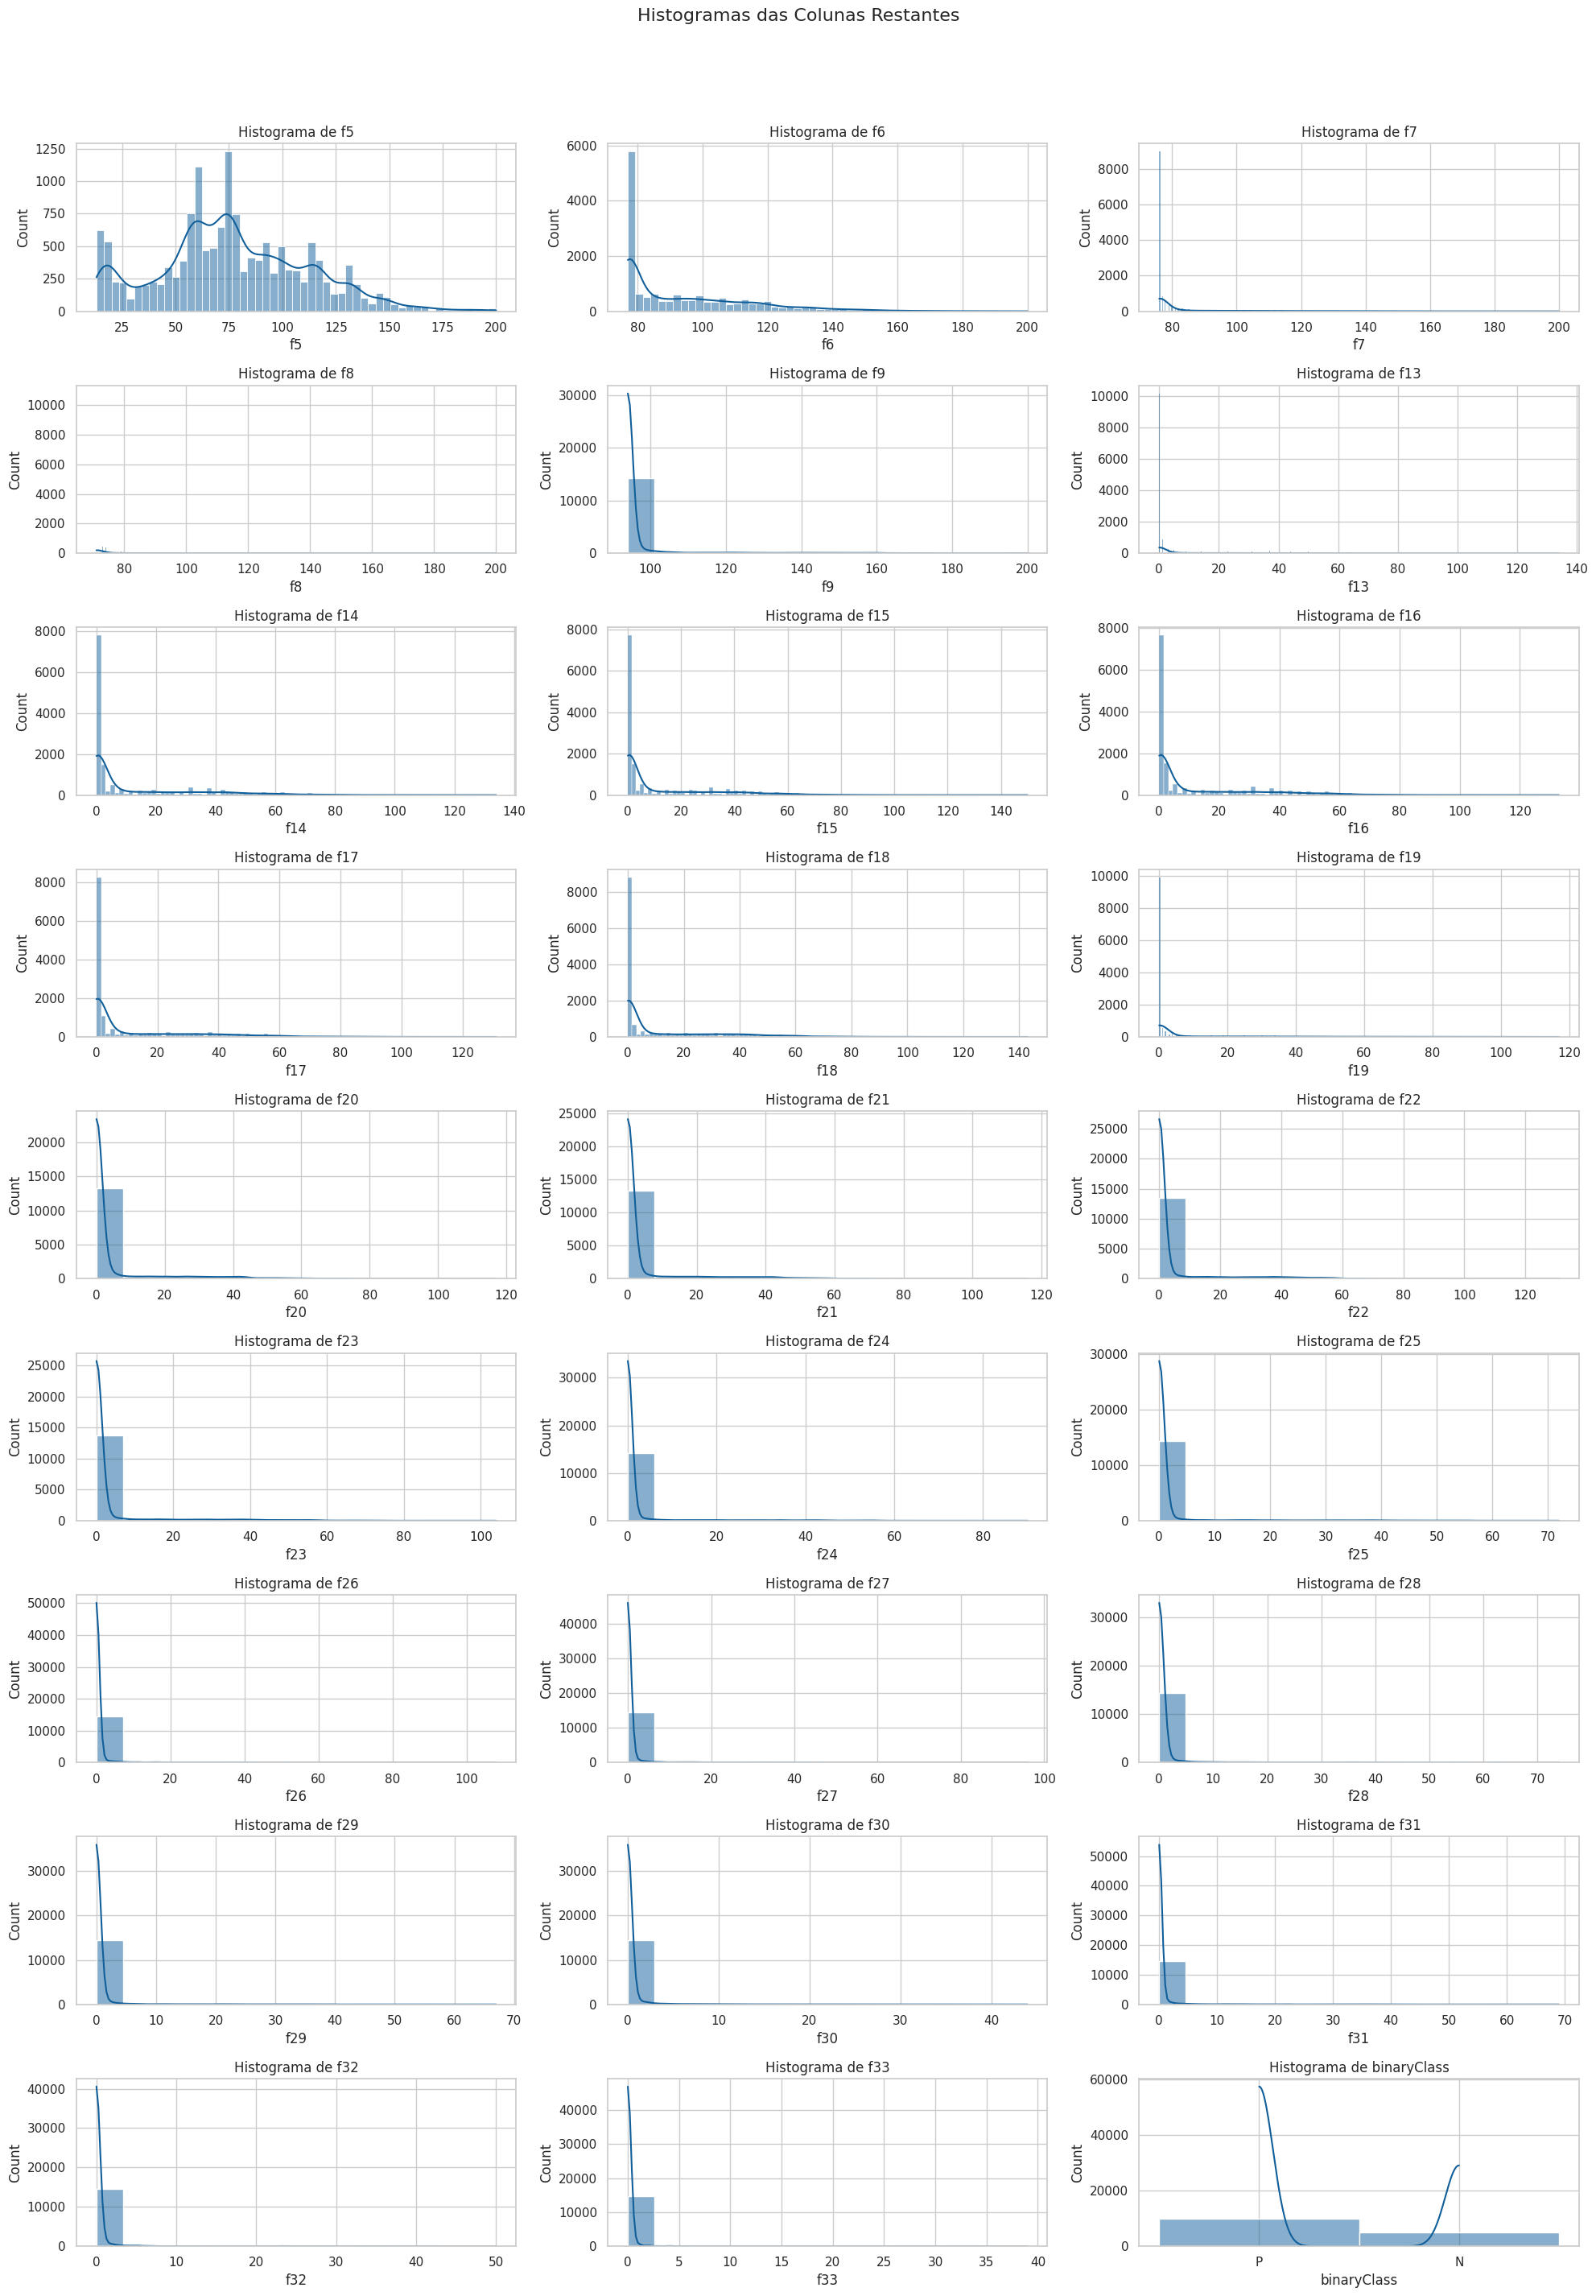

In [ ]:
# fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))
# fig.suptitle('Histogramas das Colunas Restantes', fontsize=16)

# for ax, col in zip(axes.flatten(), df_reduzido.columns):
#     sns.histplot(df_reduzido[col], kde=True, ax=ax)
#     ax.set_title(f'Histograma de {col}')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

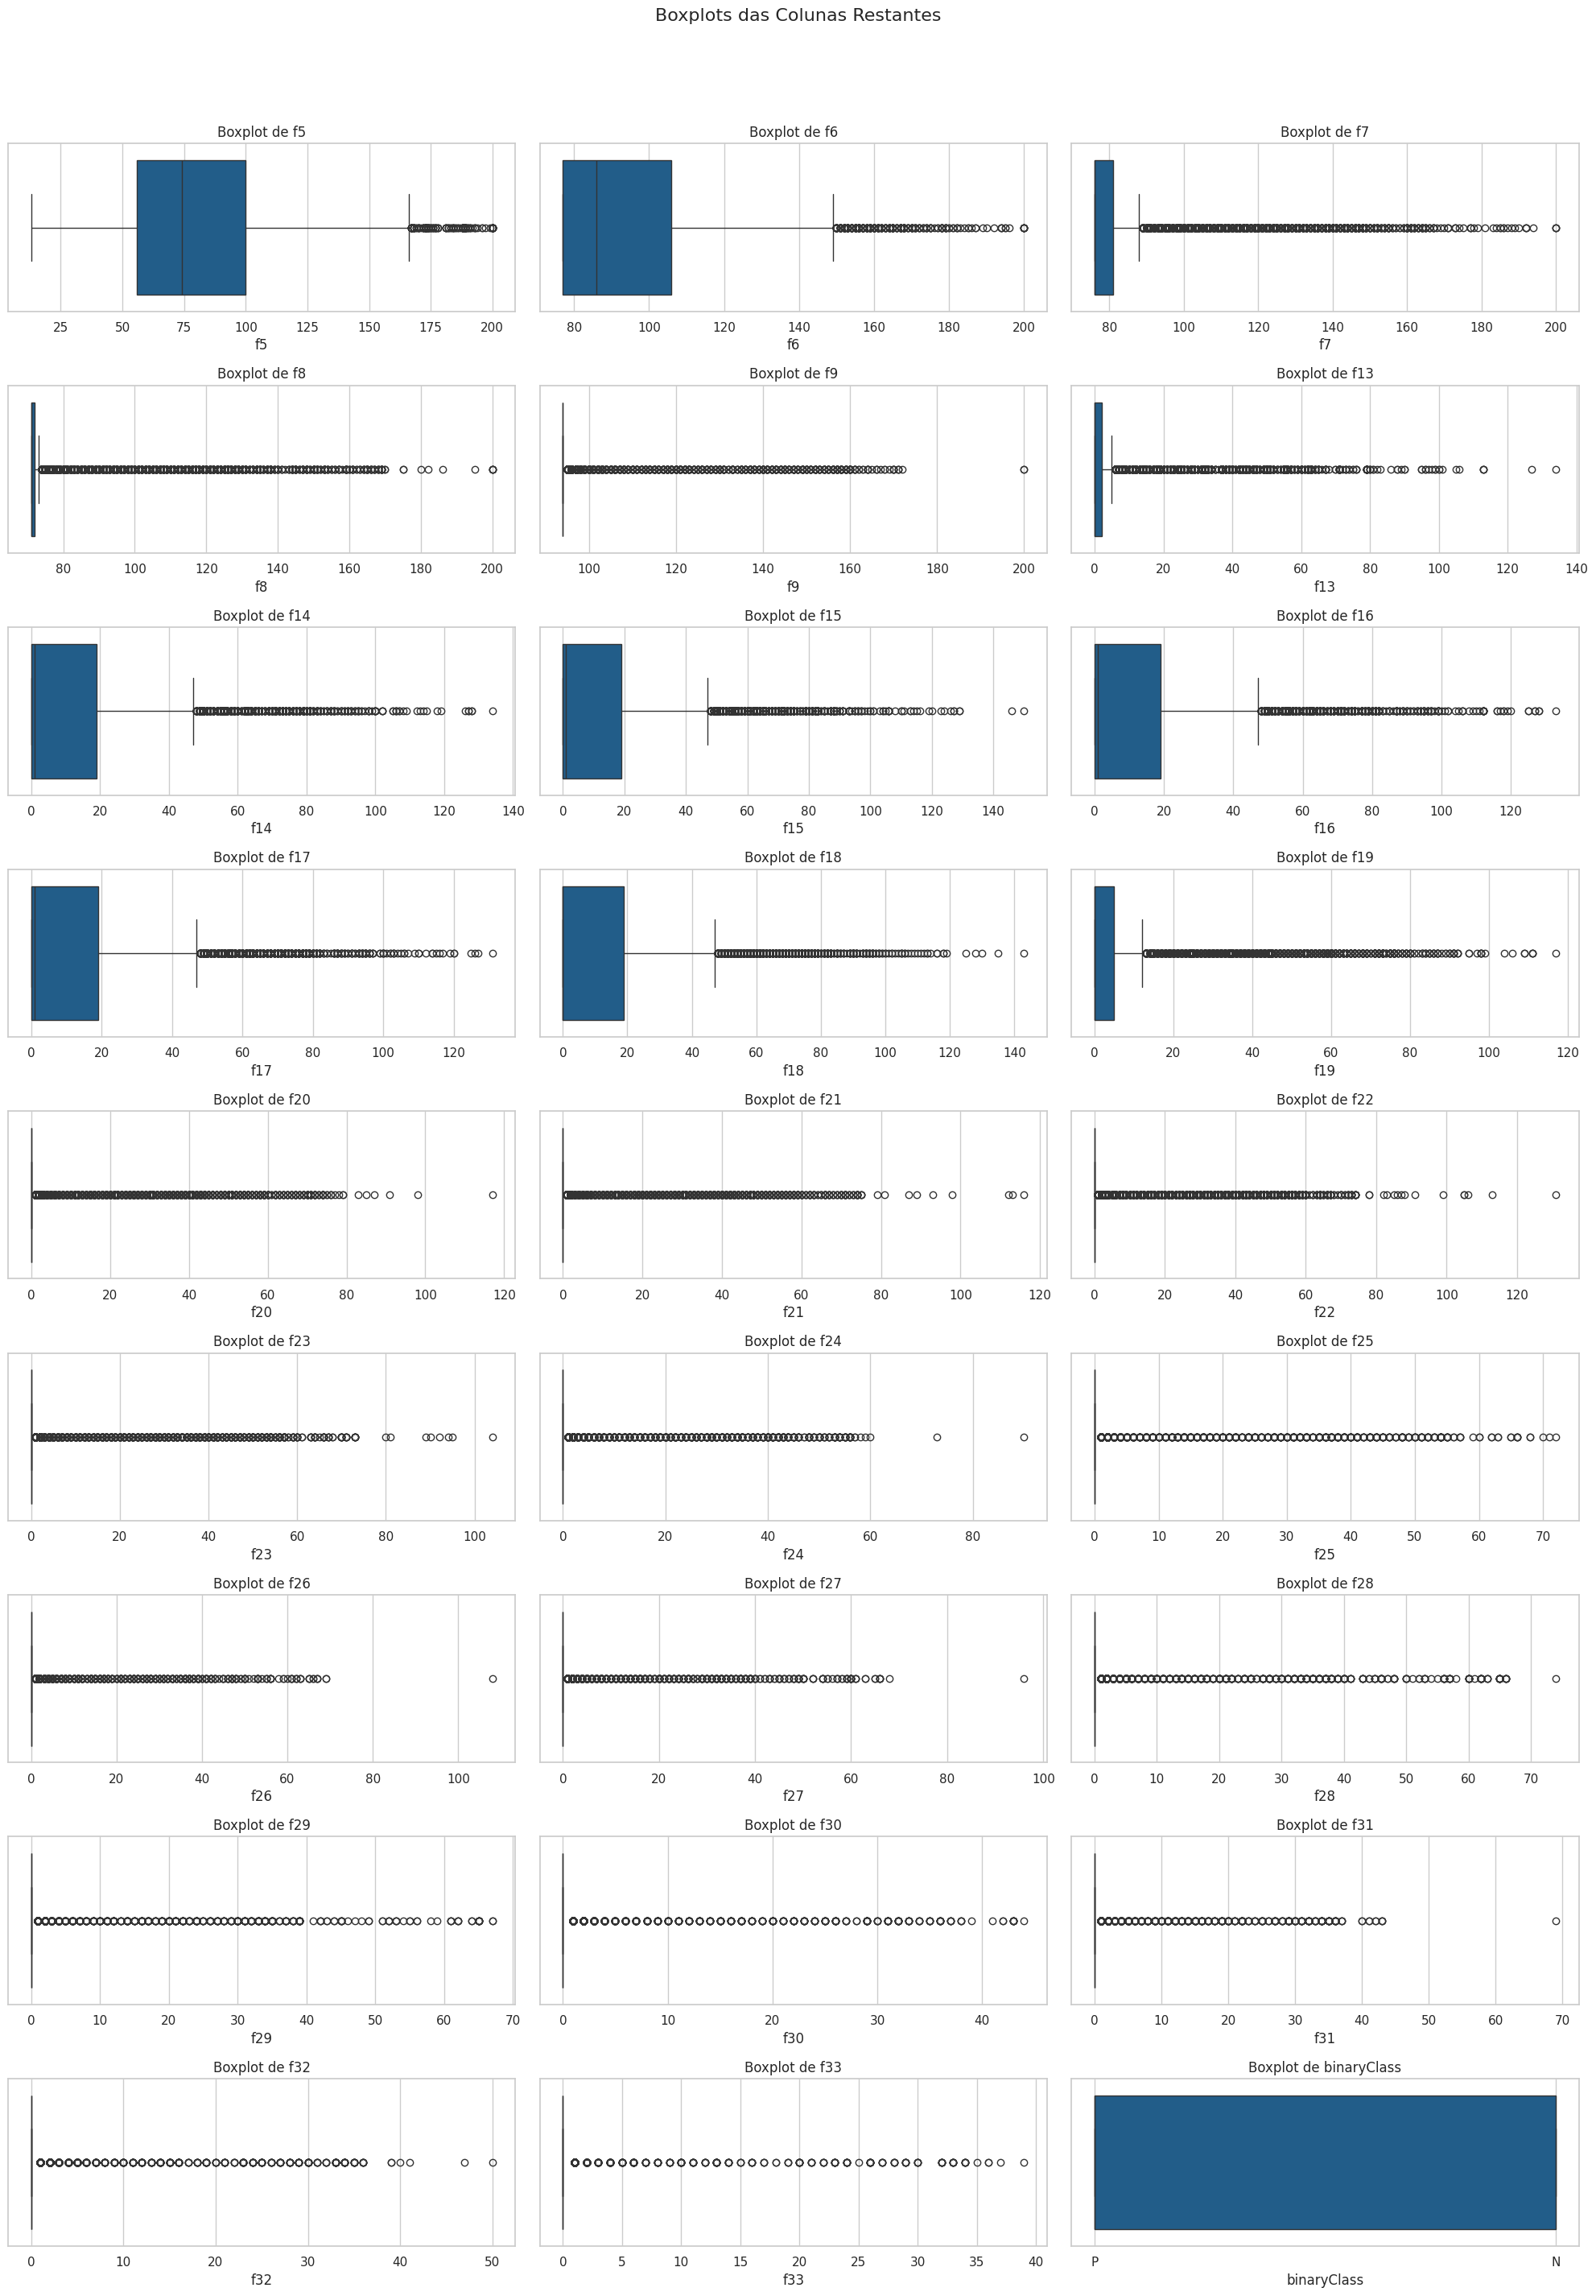

In [ ]:
# fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))
# fig.suptitle('Boxplots das Colunas Restantes', fontsize=16)

# for ax, col in zip(axes.flatten(), df_reduzido.columns):
#     sns.boxplot(x=df_reduzido[col], ax=ax)
#     ax.set_title(f'Boxplot de {col}')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

#### Gráficos de dispersão e de correlações

In [ ]:
# sns.pairplot(df_reduzido)
# plt.suptitle('Pairplot de Todas as Colunas', y=1.02, fontsize=16)
# plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_reduzido['binaryClass'] = df_reduzido['binaryClass'].apply(lambda x: 1 if x == 'P' else 0)

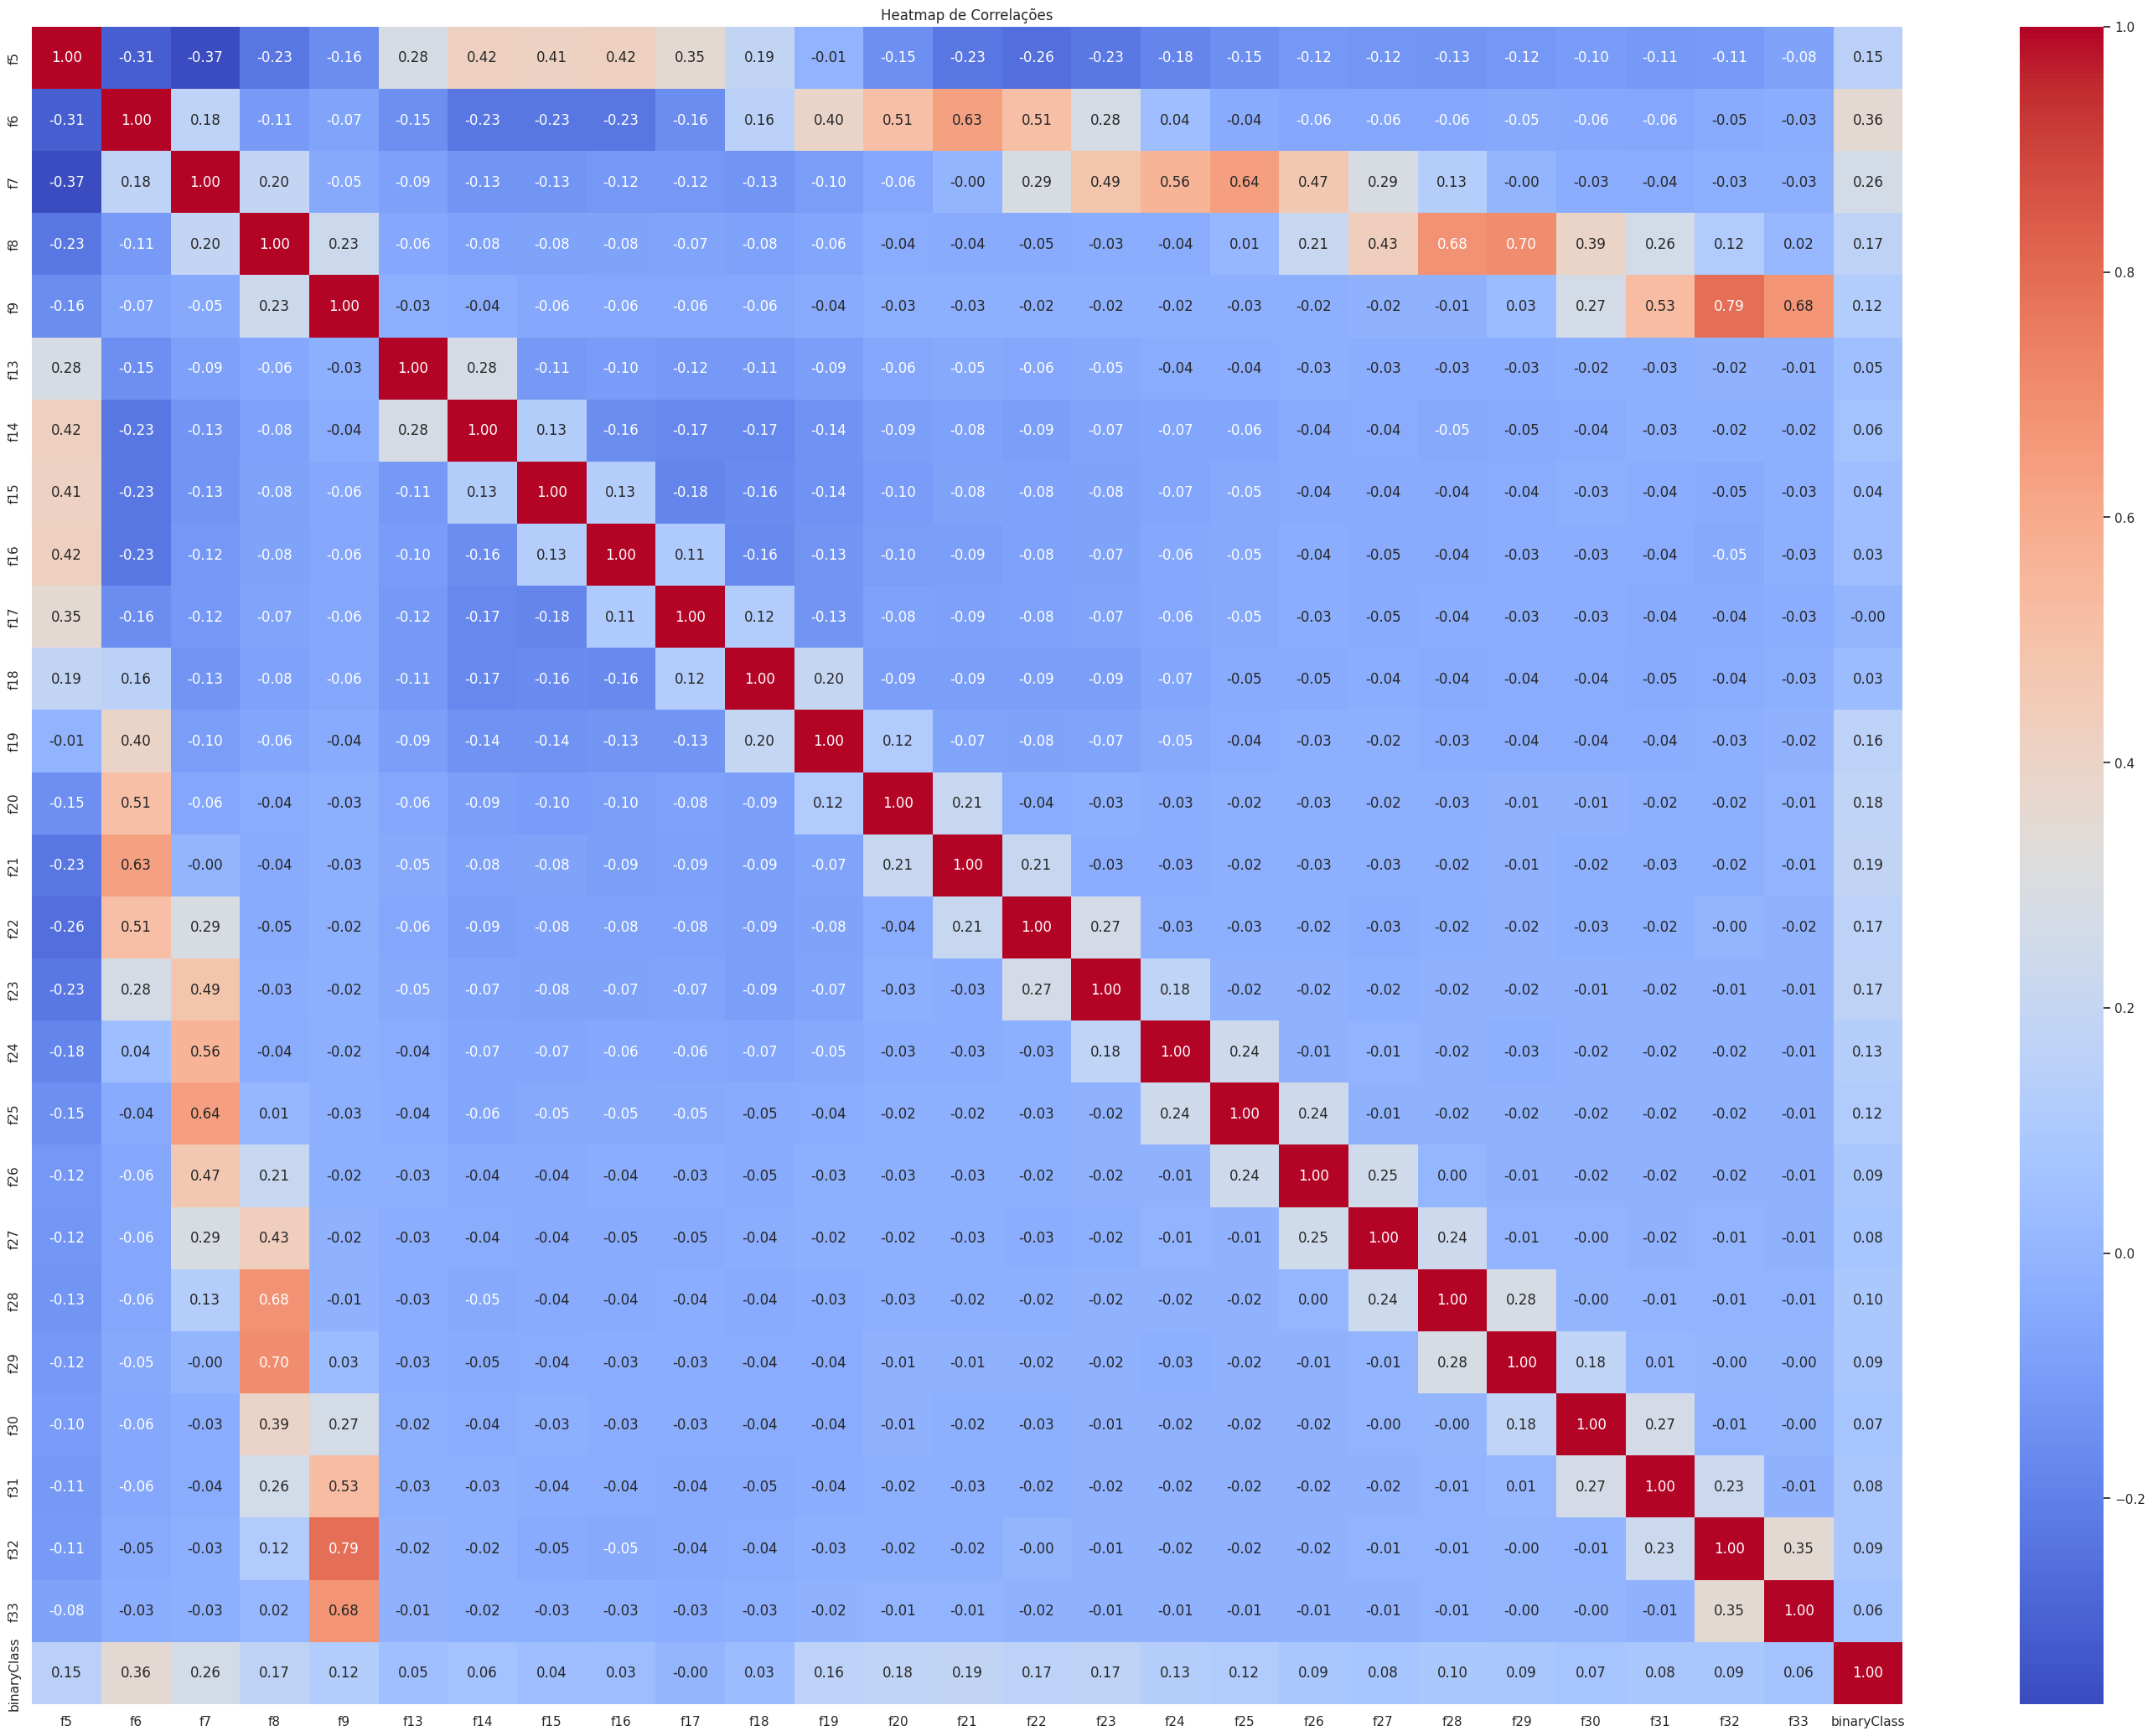

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df_reduzido.corr()

# Plotando o heatmap de correlações
plt.figure(figsize=(36, 26))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlações')
plt.show()

Análise de variáveis categóricas (frequências, modos, etc.)

In [ ]:
df_reduzido['binaryClass'].value_counts()

binaryClass
P    9959
N    5041
Name: count, dtype: int64

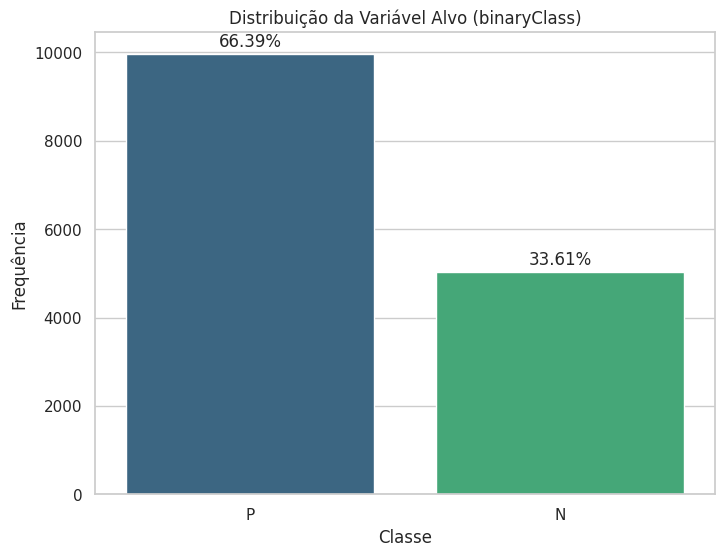

In [ ]:
contagem_classes = df_reduzido['binaryClass'].value_counts()

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=contagem_classes.index, y=contagem_classes.values, palette='viridis')

plt.title('Distribuição da Variável Alvo (binaryClass)')
plt.xlabel('Classe')
plt.ylabel('Frequência')

total = len(df_reduzido['binaryClass'])
for p in ax.patches:
    height = p.get_height()
    percentage = f'{(height / total) * 100:.2f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

In [ ]:
X = df_reduzido.drop(df_reduzido, axis=1)
y = df_reduzido['binaryClass']

In [ ]:
from scipy.stats import ks_2samp

# Função para calcular o KS
def calculate_ks(X, y):
    ks_values = {}
    for column in X.columns:
        data1 = X[y == 1][column]
        data2 = X[y == 0][column]
        ks_stat, p_value = ks_2samp(data1, data2)
        ks_values[column] = ks_stat
    return ks_values

# Exemplo de uso
# Substitua X pelo seu dataframe de features e y pelo nome da sua variável alvo
ks_values = calculate_ks(X, y)

In [ ]:
sorted_ks_values = sorted(ks_values.items(), key=lambda x: x[1], reverse=True)

for feature, ks_stat in sorted_ks_values:
    print(f"KS Score for {feature}: {ks_stat}")

KS Score for f6: 0.3923015129736741
KS Score for f5: 0.3921837518352123
KS Score for f7: 0.23499306888454924
KS Score for f21: 0.13356975462120343
KS Score for f20: 0.13025375872061368
KS Score for f22: 0.12193179897129909
KS Score for f19: 0.11594653731957442
KS Score for f8: 0.11084237279212555
KS Score for f23: 0.10163634798727152
KS Score for f17: 0.06710900926689728
KS Score for f24: 0.06574278485452327
KS Score for f15: 0.06437560433006431
KS Score for f16: 0.06412333017265252
KS Score for f9: 0.05874573750791257
KS Score for f14: 0.057758272914187204
KS Score for f25: 0.05129326210484211
KS Score for f28: 0.03714256421970826
KS Score for f26: 0.03530330335331017
KS Score for f13: 0.032913760144025535
KS Score for f32: 0.031690932625390765
KS Score for f29: 0.030388030719642262
KS Score for f27: 0.029094928962764395
KS Score for f31: 0.02897001690266733
KS Score for f18: 0.028174272700974213
KS Score for f30: 0.022511858229930973
KS Score for f33: 0.015083803523030022


In [ ]:
from scipy import stats

def identificar_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.columns:
        z_scores = stats.zscore(df[col])
        abs_z_scores = abs(z_scores)
        # Encontrar os outliers
        outliers_df = df[abs_z_scores > threshold]
        # Guardar os resultados
        outliers[col] = len(outliers_df)  # Armazenar apenas a quantidade de outliers
    return outliers

outliers_zscore = identificar_outliers_zscore(df_reduzido)

for col, num_outliers in outliers_zscore.items():
    print(f'Outliers na coluna {col} (Z-score > 3):')
    print(f'Quantidade: {num_outliers}')

Outliers na coluna f5 (Z-score > 3):
Quantidade: 64
Outliers na coluna f6 (Z-score > 3):
Quantidade: 174
Outliers na coluna f7 (Z-score > 3):
Quantidade: 407
Outliers na coluna f8 (Z-score > 3):
Quantidade: 514
Outliers na coluna f9 (Z-score > 3):
Quantidade: 403
Outliers na coluna f13 (Z-score > 3):
Quantidade: 493
Outliers na coluna f14 (Z-score > 3):
Quantidade: 218
Outliers na coluna f15 (Z-score > 3):
Quantidade: 261
Outliers na coluna f16 (Z-score > 3):
Quantidade: 259
Outliers na coluna f17 (Z-score > 3):
Quantidade: 265
Outliers na coluna f18 (Z-score > 3):
Quantidade: 241
Outliers na coluna f19 (Z-score > 3):
Quantidade: 356
Outliers na coluna f20 (Z-score > 3):
Quantidade: 539
Outliers na coluna f21 (Z-score > 3):
Quantidade: 553
Outliers na coluna f22 (Z-score > 3):
Quantidade: 565
Outliers na coluna f23 (Z-score > 3):
Quantidade: 566
Outliers na coluna f24 (Z-score > 3):
Quantidade: 444
Outliers na coluna f25 (Z-score > 3):
Quantidade: 373
Outliers na coluna f26 (Z-score > 

In [ ]:
def avaliar_significancia(outliers, df):
    significancia = {}
    for col, num_outliers in outliers.items():
        total_col = len(df[col])
        significancia[col] = (num_outliers / total_col) * 100
    return significancia

# Supondo que você já tenha calculado outliers_zscore ou outliers_iqr anteriormente
significancia_outliers = avaliar_significancia(outliers_zscore, df_reduzido)

# Exibindo a significância dos outliers por coluna
for col, sig in significancia_outliers.items():
    print(f'Significância dos outliers na coluna {col}: {sig:.2f}%')

Significância dos outliers na coluna f5: 0.43%
Significância dos outliers na coluna f6: 1.16%
Significância dos outliers na coluna f7: 2.71%
Significância dos outliers na coluna f8: 3.43%
Significância dos outliers na coluna f9: 2.69%
Significância dos outliers na coluna f13: 3.29%
Significância dos outliers na coluna f14: 1.45%
Significância dos outliers na coluna f15: 1.74%
Significância dos outliers na coluna f16: 1.73%
Significância dos outliers na coluna f17: 1.77%
Significância dos outliers na coluna f18: 1.61%
Significância dos outliers na coluna f19: 2.37%
Significância dos outliers na coluna f20: 3.59%
Significância dos outliers na coluna f21: 3.69%
Significância dos outliers na coluna f22: 3.77%
Significância dos outliers na coluna f23: 3.77%
Significância dos outliers na coluna f24: 2.96%
Significância dos outliers na coluna f25: 2.49%
Significância dos outliers na coluna f26: 1.89%
Significância dos outliers na coluna f27: 1.97%
Significância dos outliers na coluna f28: 1.9

In [ ]:
def calcular_significancia_total(outliers, df):
    total_outliers = sum(outliers.values())
    total_base = df.size
    return (total_outliers / total_base) * 100

significancia_total = calcular_significancia_total(outliers_zscore, df_reduzido)

print(f'Significância total dos outliers em relação à base: {significancia_total:.2f}%')

Significância total dos outliers em relação à base: 2.16%


Identificação de dados duplicados e inconsistentes.

In [ ]:
# Verificar duplicatas no dataframe inteiro
quantidade_duplicatas = df_reduzido.duplicated().sum()

# Exibir a quantidade de linhas duplicadas, se existirem
if quantidade_duplicatas > 0:
    print(f"Quantidade de linhas duplicadas no dataset: {quantidade_duplicatas}")
else:
    print("Não foram encontradas linhas duplicadas no dataset.")

Quantidade de linhas duplicadas no dataset: 42


In [ ]:
# Verificar valores nulos em todo o dataframe
quantidade_valores_nulos = df_reduzido.isnull().any(axis=1).sum()

# Exibir a quantidade de linhas com valores nulos, se existirem
if quantidade_valores_nulos > 0:
    print(f"Quantidade de linhas com valores nulos no dataset: {quantidade_valores_nulos}")
else:
    print("Não foram encontradas linhas com valores nulos no dataset.")

Não foram encontradas linhas com valores nulos no dataset.
